In [89]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import math

# Load data from ascii file
x = np.genfromtxt('ex5/ex5Logx.dat', delimiter=',')
y = np.genfromtxt('ex5/ex5Logy.dat')
y = np.expand_dims(y, axis=1)

pos = np.where(y==1)
neg = np.where(y==0)

# Plot the training data
plt.plot(x[pos, 0], x[pos, 1], 'b+', label='y = 1')
plt.plot(x[neg, 0], x[neg, 1], 'ro', label='y = 0')
#plt.show()

arr = x[:,0] ** 2
arr = np.expand_dims(arr, axis=1)

In [90]:
def map_feature(f1, f2):
    out = np.ones((np.size(f1), 1))
    for i in range(1,7):
        for j in range(0,i+1):
            xc = np.expand_dims( (f1 ** (i-j)) * (f2 ** j), axis=1 )
            out = np.hstack((out, xc ))
    return out

x = map_feature(x[:,0], x[:,1])
(m, n) = np.shape(x)

theta = np.zeros(n)
theta = np.expand_dims(theta, axis=1)

In [91]:
sigmoid = lambda a: 1 / (1 + math.exp(-a))

# Vectorize sigmoid so it can operate on whole matrix
vecsig = np.vectorize(sigmoid)

max_itr = 15
j = np.zeros(max_itr)

lmbda = 0

for i in range(max_itr):
    # Calculate the hypothesis function
    z = x.dot(theta)
    h = vecsig(z)
    h = np.array(h)

    g = (lmbda / m) * (theta)
    g[1] = 0
    l = (lmbda / m) * (np.eye(n))
    l[1] = 0
    
    # Calculate the gradient and hessian
    # The implementation below is equivalent to the summation formulas
    grad = ( x.transpose().dot(h - y) / m ) + g
    hes = ( x.transpose().dot( np.diag(h[:,0]) ).dot( np.diag(1 - h[:,0]) ).dot(x) / m ) + l
    
    
    # Update theta
    theta = theta - np.linalg.lstsq(hes, grad)[0]
    
# theta

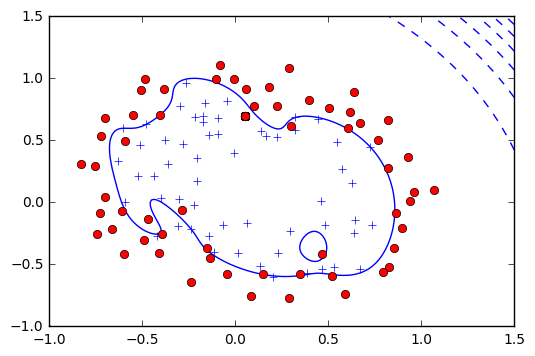

In [92]:
# The grid range
u = np.linspace(-1, 1.5, 200)
u = np.expand_dims(u, axis=1)
v = np.linspace(-1, 1.5, 200)
v = np.expand_dims(v, axis=1)

z = np.zeros((len(u), len(v)))

# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = map_feature(u[i], v[j]).dot(theta)
        
z = z.transpose()

u, v = np.meshgrid(u, v)

plt.contour(u, v, z, colors='b', label='Decision boundary')

plt.show()